In [2]:
import datetime as dt
import time

import numpy as np
import pandas as pd

import pylab as pl
import seaborn as sns

import tqdm as tq

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df_features = pd.read_csv(
    '/Users/anokhin/Desktop/activity_features.tsv', 
    sep='\t', 
    header=None,
    index_col=0,
    names=["n_hits", "n_displays", "n_clicks", "n_vids", "n_emails", "n_okids", "n_vkids"],
)

df_features["n_uids"] = df_features.n_vids + df_features.n_emails + df_features.n_okids + df_features.n_vkids
df_features.head()

,n_hits,n_displays,n_clicks,n_vids,n_emails,n_okids,n_vkids,n_uids
101a0a37d,6,0,0,1,0,1,0,2
101a0be9a,76,0,0,2,0,0,1,3
101a0cd35,90,53,1,1,1,0,0,2
101a1d5b3,9,0,0,1,1,0,0,2
101a3d682,15,0,0,1,0,1,0,2


In [4]:
df_features.describe()

,n_hits,n_displays,n_clicks,n_vids,n_emails,n_okids,n_vkids,n_uids
count,453862.000000,453862.000000,453862.000000,4.538620e+05,453862.000000,453862.000000,4.538620e+05,4.538620e+05
mean,41.617809,6.606693,0.036875,3.703984e+04,13195.010320,13438.557751,4.292343e+04,1.065968e+05
std,354.256873,41.571017,0.573498,2.641339e+05,94096.203034,95830.971046,3.061033e+05,7.601643e+05
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,3.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,1.000000e+00
50%,10.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,2.000000e+00
75%,39.000000,3.000000,0.000000,2.000000e+00,1.000000,1.000000,1.000000e+00,4.000000e+00
max,222281.000000,12814.000000,180.000000,1.920705e+06,684240.000000,696855.000000,2.225892e+06,5.527692e+06


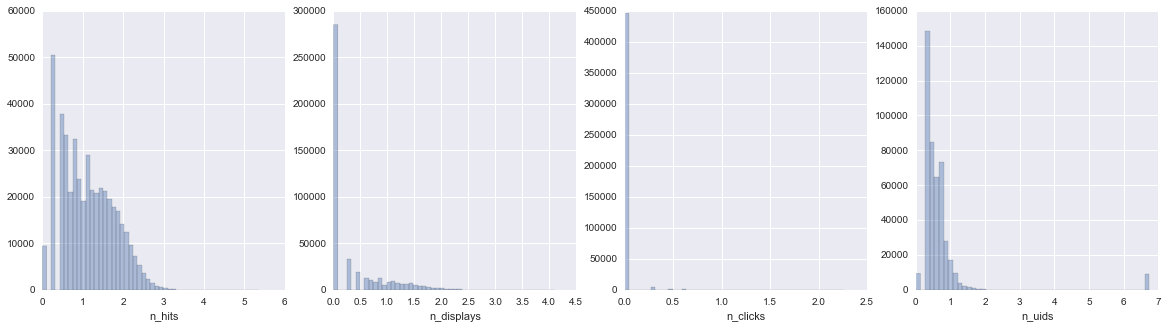

In [5]:
pl.figure(figsize=(20, 5))

pl.subplot(1, 4, 1)
sns.distplot(np.log10(1 + df_features.n_hits), kde=False, bins=50)

pl.subplot(1, 4, 2)
sns.distplot(np.log10(1 + df_features.n_displays), kde=False, bins=50)

pl.subplot(1, 4, 3)
sns.distplot(np.log10(1 + df_features.n_clicks), kde=False, bins=50)

pl.subplot(1, 4, 4)
sns.distplot(np.log10(1 + df_features.n_uids), kde=False, bins=50)

pl.show()

In [48]:
bins = 100

def apply_percentiles(z, percentiles, index):
    for i, p in enumerate(percentiles):
        if p > z:            
            ind = max(i - 1, 0)
            return 1.0 * index[ind] / bins # + np.random.random() * 1.0 / bins * (index[ind + 1] - index[ind])
    return 1.0

n_hits_percentiles = np.percentile(df_features.n_hits, np.linspace(0, 100, bins + 1))
n_hits_p, n_hits_i = np.unique(n_hits_percentiles, return_index=True)

n_displays_percentiles = np.percentile(df_features.n_displays, np.linspace(0, 100, bins + 1))
n_displays_p, n_displays_i = np.unique(n_displays_percentiles, return_index=True)

n_clicks_percentiles = np.percentile(df_features.n_clicks, np.linspace(0, 100, bins + 1))
n_clicks_p, n_clicks_i = np.unique(n_clicks_percentiles, return_index=True)

n_uids_percentiles = np.percentile(df_features.n_uids, np.linspace(0, 100, bins + 1))
n_uids_p, n_uids_i = np.unique(n_uids_percentiles, return_index=True)

data = {
    "n_hits": df_features.n_hits.map(lambda z: apply_percentiles(z, n_hits_p, n_hits_i)),
    "n_displays": df_features.n_displays.map(lambda z: apply_percentiles(z, n_displays_p, n_displays_i)),
    "n_clicks": df_features.n_clicks / df_features.n_clicks.max(), # df_features.n_clicks.map(lambda z: apply_percentiles(z, n_clicks_p, n_clicks_i)),    
    "n_uids": df_features.n_uids.map(lambda z: apply_percentiles(z, n_uids_p, n_uids_i)),
}

df_transformed = pd.DataFrame(data).set_index(df_features.index)

In [49]:
percentile_data = {
    "hits": {'percentiles': n_hits_p.tolist(), 'indices': n_hits_i.tolist()},
    "displays": {'percentiles': n_displays_p.tolist(), 'indices': n_displays_i.tolist()},
    "uids": {'percentiles': n_uids_p.tolist(), 'indices': n_uids_i.tolist()},
    "clicks": {'percentiles': n_clicks_p.tolist(), 'indices': n_clicks_i.tolist()}
}

import json
with open("feature_percentiles.json", "w") as pf:
    json.dump(percentile_data, pf)    

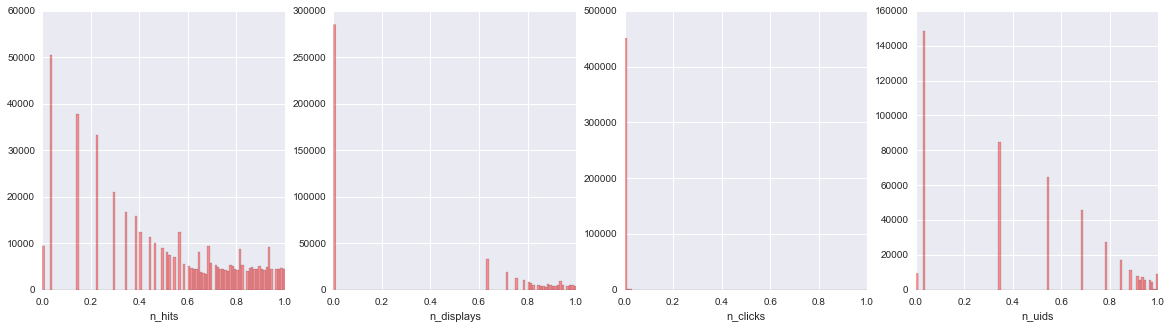

In [50]:
pl.figure(figsize=(20, 5))

pl.subplot(1, 4, 1)
sns.distplot(df_transformed.n_hits, kde=False, bins=bins, color='r')

pl.subplot(1, 4, 2)
sns.distplot(df_transformed.n_displays, kde=False, bins=bins, color='r')

pl.subplot(1, 4, 3)
sns.distplot(df_transformed.n_clicks, kde=False, bins=bins, color='r')

pl.subplot(1, 4, 4)
sns.distplot(df_transformed.n_uids, kde=False, bins=bins, color='r')

pl.show()

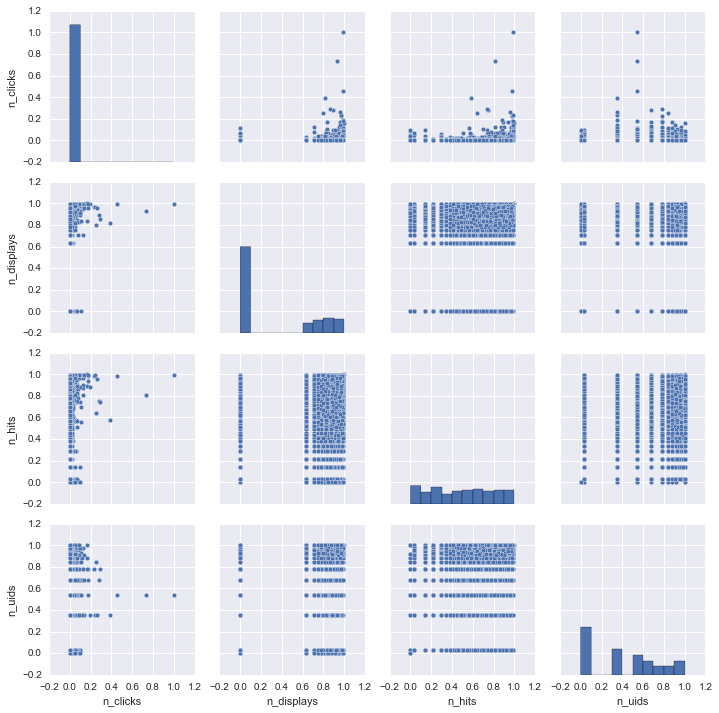

In [51]:
sns.pairplot(df_transformed)

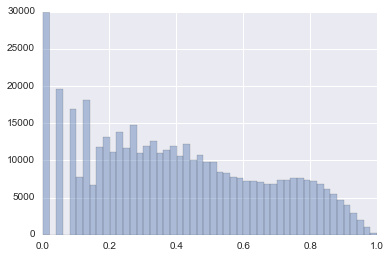

In [52]:
sns.distplot((df_transformed.n_hits + df_transformed.n_displays + df_transformed.n_clicks + df_transformed.n_uids).map(lambda z: min(1, z/3)), kde=False)